In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\brooke\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Read the CSV and Perform Basic Data Cleaning

In [37]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_impact', 'koi_slogg', 'koi_kepmag', 'dec'  ]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
# Assign X and y values
X = selected_features.drop('koi_disposition',axis=1)
y = selected_features['koi_disposition']

In [8]:
# Use train_test_split to create test and train sets of data

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=22)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_slogg,koi_kepmag,dec
5448,0,1,0,0,6.099033,0.8910,4.297,13.745,44.577209
5953,0,1,1,0,18.360224,0.1819,4.551,15.703,42.061729
2226,0,0,0,0,25.752750,0.5160,4.501,14.550,43.853260
6586,1,0,0,0,354.789700,0.4490,4.742,10.067,41.318802
4346,0,1,1,1,2.845736,1.2940,2.745,12.367,40.649029


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



#### Logistic Regression

In [14]:
classifier = LogisticRegression(class_weight='balanced', max_iter=5000)
classifier

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7352660690444403
Testing Data Score: 0.7482837528604119


#### Decision Tree

In [17]:
# Set up Decision Tree Model & print train/test scores
clf = tree.DecisionTreeClassifier(max_depth=11, class_weight='balanced')
clf = clf.fit(X_train_scaled, y_train)
print('Train score: {}'.format(clf.score(X_train_scaled, y_train)))
print('Test score: {}'.format(clf.score(X_test_scaled, y_test)))

Train score: 0.8481785237459469
Test score: 0.7974828375286042


#### Random Forest

In [18]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced')
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8100686498855835

In [19]:
# Calculate feature importance
importances = rf.feature_importances_
importances

array([0.12688076, 0.16360714, 0.10983109, 0.04191871, 0.12950893,
       0.12822601, 0.10610194, 0.09875778, 0.09516763])

In [20]:
 # Sort the features by their importance
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.16360714173428803, 'koi_fpflag_ss'),
 (0.12950892757946653, 'koi_period'),
 (0.12822601341220882, 'koi_impact'),
 (0.1268807589524399, 'koi_fpflag_nt'),
 (0.10983108569961501, 'koi_fpflag_co'),
 (0.10610194076131484, 'koi_slogg'),
 (0.09875778387397535, 'koi_kepmag'),
 (0.09516763496504843, 'dec'),
 (0.04191871302164315, 'koi_fpflag_ec')]

In [21]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9998092695021934
Testing Data Score: 0.8100686498855835


#### KNN

k: 1, Train/Test Score: 1.000/0.782
k: 3, Train/Test Score: 0.887/0.786
k: 5, Train/Test Score: 0.861/0.789
k: 7, Train/Test Score: 0.850/0.792
k: 9, Train/Test Score: 0.840/0.798
k: 11, Train/Test Score: 0.831/0.793
k: 13, Train/Test Score: 0.824/0.800
k: 15, Train/Test Score: 0.825/0.793
k: 17, Train/Test Score: 0.825/0.792
k: 19, Train/Test Score: 0.826/0.791


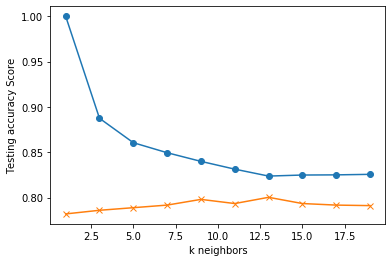

In [22]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.798


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [27]:
# Create the GridSearchCV model
param_grid = {'n_estimators':[100,200,300,400, 500],
             'min_samples_leaf':[1,2,3,4]}

In [31]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3)

In [32]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, n_estimators=100, score=0.801, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.821, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.823, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.823, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.814, total=   0.5s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.804, total=   1.0s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.819, total=   1.2s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.817, total=   1.2s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.832, total=   1.0s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  

[CV]  min_samples_leaf=3, n_estimators=300, score=0.813, total=   1.4s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.827, total=   1.4s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.825, total=   1.4s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.832, total=   1.4s
[CV] min_samples_leaf=3, n_estimators=300 ............................
[CV]  min_samples_leaf=3, n_estimators=300, score=0.813, total=   1.4s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  min_samples_leaf=3, n_estimators=400, score=0.808, total=   1.9s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  min_samples_leaf=3, n_estimators=400, score=0.822, total=   1.9s
[CV] min_samples_leaf=3, n_estimators=400 ............................
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'min_samples_leaf': 4, 'n_estimators': 100}
0.8231931174000684


# Save the Model

In [35]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'brooke.sav'
joblib.dump(grid, filename)

['brooke.sav']